In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df = pd.read_csv('spam.csv',encoding = 'Windows-1252')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
# Data cleaning
# EDA
# Text processing
# Model Building
# Evaluation
# Implementation

# Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping columns that are not needed as u can see unnamed 2,3,4 are not needed 
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.sample(10)

,v1,v2
3964,ham,Love you aathi..love u lot..
5113,ham,U definitely need a module from e humanities d...
4828,ham,"How long before you get reply, just defer admi..."
246,ham,I asked you to call him now ok
3813,ham,Can. Dunno wat to get 4 her...
1296,ham,Sure! I am driving but will reach my destinati...
3174,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
4173,ham,And pls pls drink plenty plenty water
5400,ham,HARD BUT TRUE: How much you show &amp; expres...
1121,spam,Do you want 750 anytime any network mins 150 t...


In [8]:
df.rename(columns = {'v1':'Target','v2':'Text'}, inplace =True)

In [9]:
df.head(10)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
#Label encoder assigns the values in the second column numeric values, in this case it assigns spam = 1 and ham = 0

In [11]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [12]:
# The encoder has assigned spam as 1 and ham(not spam) as 0

In [13]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
#Check for duplicate values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [16]:
df.shape
df.duplicated().sum()

0

# Exploratory data analysis

In [17]:
import matplotlib.pyplot as plt

In [18]:
counts = df['Target'].value_counts()

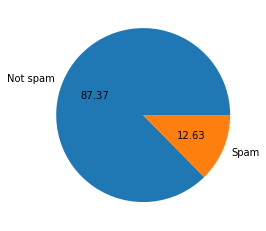

In [19]:
plt.pie(counts, labels = ['Not spam','Spam'],autopct = "%0.2f")
plt.show()
#We have more data for ham compared to spam so there is a data imbalance

In [20]:
!pip install nltk
import nltk

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/soham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/soham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Finding out the number of chars, sentences and words in each msg in the dataframe

In [22]:
df['Text'].apply(len)
df['Number_of_chars'] = df['Text'].apply(len)

In [23]:
df.head(10)

,Target,Text,Number_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [24]:
#This seperates the words and turns them in to a list and creates the data frame
words = df['Text'].apply(lambda x:nltk.word_tokenize(x))

In [25]:
df["Number_of_words"] = words.apply(len)

In [26]:
df.head(10)

,Target,Text,Number_of_chars,Number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [27]:
sent = df['Text'].apply(lambda x:nltk.sent_tokenize(x))

In [28]:
df['Number_of_sent'] = sent.apply(len)

In [29]:
df.head(10)

,Target,Text,Number_of_chars,Number_of_words,Number_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [30]:
df[['Number_of_chars','Number_of_words','Number_of_sent']].describe()

,Number_of_chars,Number_of_words,Number_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['Target'] == 0][['Number_of_chars','Number_of_words','Number_of_sent']].describe() #not spam

,Number_of_chars,Number_of_words,Number_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['Target'] == 1][['Number_of_chars','Number_of_words','Number_of_sent']].describe() #spam

,Number_of_chars,Number_of_words,Number_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='Number_of_chars', ylabel='Count'>

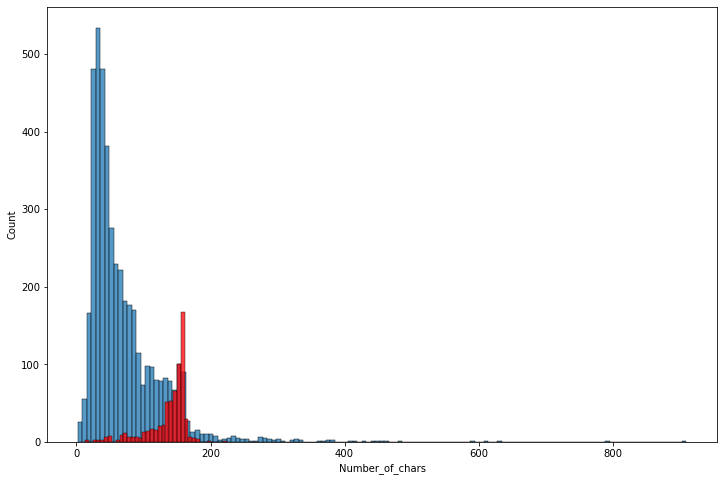

In [33]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target'] == 0]['Number_of_chars'])
sns.histplot(df[df['Target'] == 1]['Number_of_chars'], color = "red")

<AxesSubplot:xlabel='Number_of_words', ylabel='Count'>

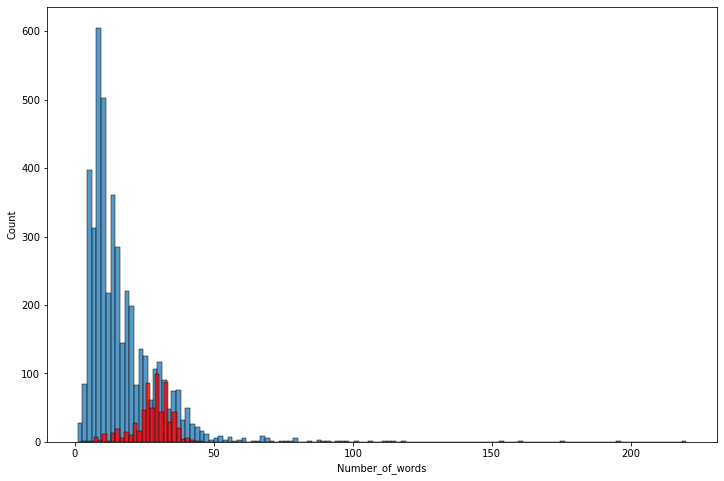

In [34]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target'] == 0]['Number_of_words'])
sns.histplot(df[df['Target'] == 1]['Number_of_words'], color = "red")

## As we can see more number of spam msgs have higher number of words in an average. However there are some outliers in the data we get a general idea about the trends in the data

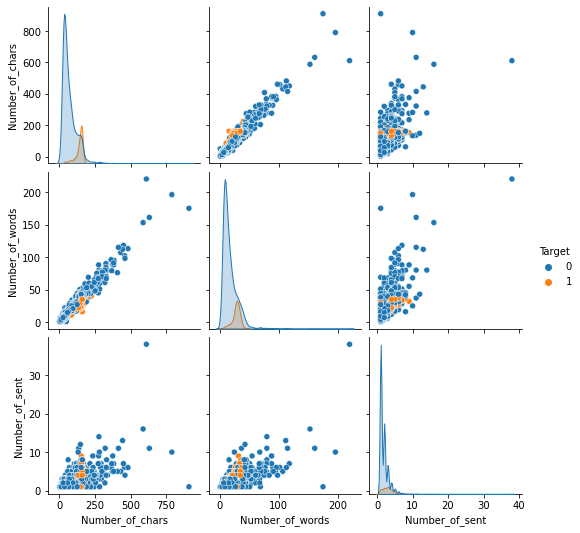

In [35]:
sns.pairplot(df,hue = "Target")

In [36]:
cor = df.corr()
cor

,Target,Number_of_chars,Number_of_words,Number_of_sent
Target,1.000000,0.384717,0.262969,0.267602
Number_of_chars,0.384717,1.000000,0.965784,0.626118
Number_of_words,0.262969,0.965784,1.000000,0.680882
Number_of_sent,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

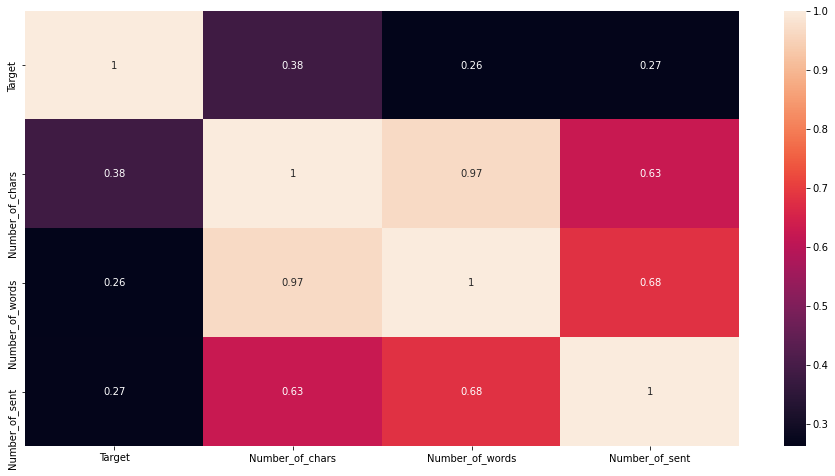

In [37]:
plt.figure(figsize = (16,8))
sns.heatmap(cor,annot = True)

#number of words has the highest corelation with the target

### After this analysis we found out that sms/emails with higher number of characters are more likely to be scam. Same goes for the number of words, however there are some outliers in this case which can hinder our classification. So we will most likely use number of characters as a parameter for classification.

# Data Pre-Processing

In [38]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
i = "if"
if i in stopwords.words('english'):
    print('True')

True


In [41]:
ps = PorterStemmer()
ps.stem('Playing')

'play'

In [42]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text = text.lower() #Converting it into lower case
    text = nltk.word_tokenize(text) #Tokenizing and seperating all the words
    cleaned_data = []
    for i in text:
        if i.isalnum():  #Only keeping the alpha numeric words in the email/sms
            cleaned_data.append(i)
        
    text = cleaned_data
    cleaned_data = []
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #Removing unnceassry words and punctuations
            cleaned_data.append(i)
    
    
    text = cleaned_data
    cleaned_data = []
    
    #Stemming
    for i in text:
        cleaned_data.append(ps.stem(i))
        
    return " ".join(cleaned_data)
    
    


In [43]:
transform_text("If this is a test lmao 4416684 yourself is a man () /-sjxshbc playing crying joining reducing")

'test lmao 4416684 man play cri join reduc'

In [44]:
df["transformed_text"] = df["Text"].apply(transform_text)

In [45]:
df.head(10)

,Target,Text,Number_of_chars,Number_of_words,Number_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [46]:
from wordcloud import WordCloud

In [47]:
!pip install wordcloud

In [48]:
wc = WordCloud(width = 1000, height = 1000,min_font_size = 15,background_color = "white")
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = " "))


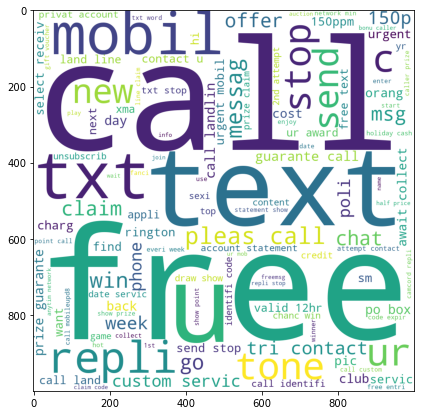

In [49]:
plt.figure(figsize = (15,7))
plt.imshow(spam_wc)

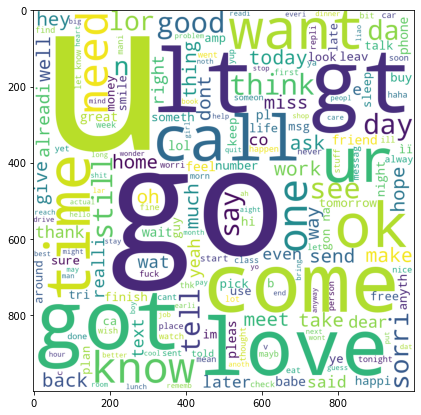

In [50]:
plt.figure(figsize = (15,7))
not_spam_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(not_spam_wc) 

## Finding the most used words

In [51]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [52]:
print(spam_corpus)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [53]:
from collections import Counter
Counter(spam_corpus) #Counting all the words in the msessages


Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [54]:
Counter(spam_corpus).most_common(30) #counting the most common  words

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [55]:
common_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [56]:
common_spam_words.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


/home/soham/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

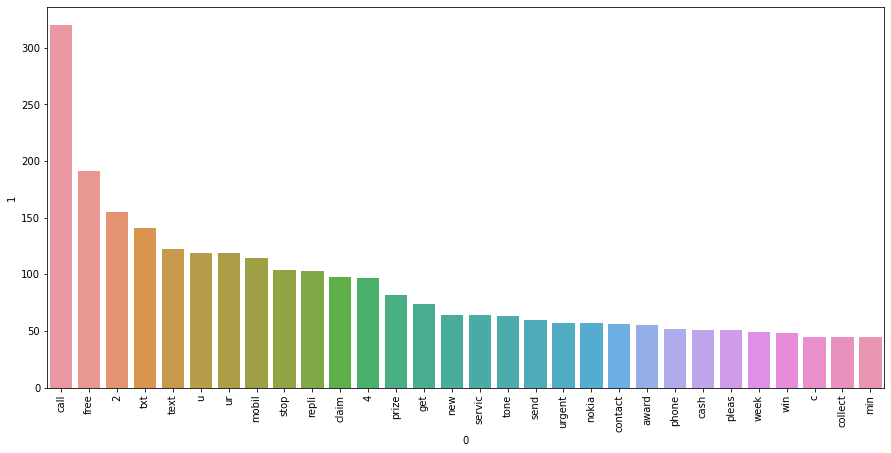

In [57]:
plt.figure(figsize = (15,7))
sns.barplot(common_spam_words[0],common_spam_words[1]) #selecting col 0 and 1
plt.xticks(rotation = "vertical") #rotating the label in x axis
plt.show

/home/soham/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

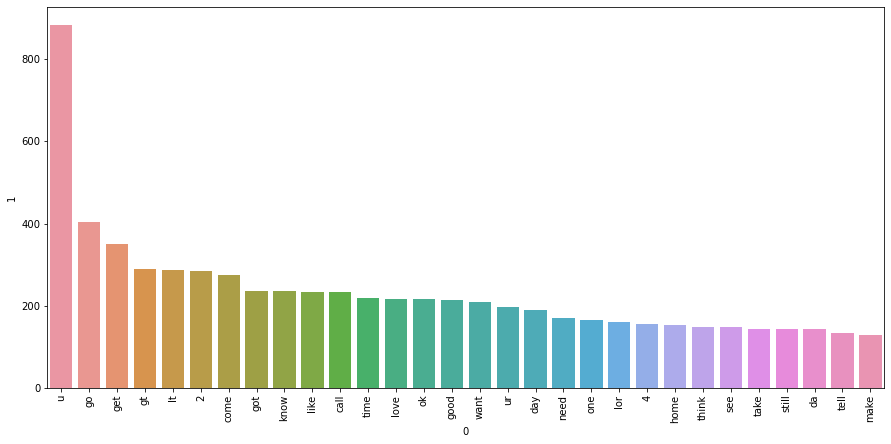

In [58]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize = (15,7))
sns.barplot(common_ham_words[0],common_ham_words[1]) #selecting col 0 and 1
plt.xticks(rotation = "vertical") #rotating the label in x axis
plt.show

# Model building

## using count vectorizer

In [59]:
#To train our model we gotta convert our words into numbers. So we will vectorize it using it bagofwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [60]:
cv = CountVectorizer()

In [61]:
x = cv.fit_transform(df["transformed_text"]).toarray()

In [62]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
x.shape

(5169, 6708)

In [64]:
y = df["Target"].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [68]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))

0.8800773694390716
0.8800773694390716


In [70]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
0.8344370860927153


In [71]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
0.9734513274336283


In [72]:
tmp_df = pd.DataFrame()

In [73]:
tmp_df["Naive Bayes"] = ["GNB","MNB","BNB"]

In [74]:
tmp_df["Accuracy score"] = [accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)]
tmp_df["Precision score"] =  [accuracy_score(y_test, y_pred1),precision_score(y_test, y_pred2),precision_score(y_test, y_pred3)]

In [75]:
tmp_df

,Naive Bayes,Accuracy score,Precision score
0,GNB,0.880077,0.880077
1,MNB,0.964217,0.834437
2,BNB,0.970019,0.973451


## using tfidf vectorizer

In [76]:
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [77]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df["transformed_text"]).toarray()
y = df["Target"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [78]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
0.5231481481481481


In [79]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
1.0


In [80]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
0.9734513274336283


In [81]:
tmp_df["TFIDF Accuracy score"] = [accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)]
tmp_df["TFIDF Precision score"] =  [accuracy_score(y_test, y_pred1),precision_score(y_test, y_pred2),precision_score(y_test, y_pred3)]

In [82]:
tmp_df

,Naive Bayes,Accuracy score,Precision score,TFIDF Accuracy score,TFIDF Precision score
0,GNB,0.880077,0.880077,0.876209,0.876209
1,MNB,0.964217,0.834437,0.959381,1.000000
2,BNB,0.970019,0.973451,0.970019,0.973451


# Improving the model

In [83]:
# Choosing only the most used 3000 words from the corpus

In [84]:
tfidf = TfidfVectorizer(max_features = 3000)
x = tfidf.fit_transform(df["transformed_text"]).toarray()
y = df["Target"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [85]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
0.5068493150684932


In [86]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
1.0


In [87]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
0.991869918699187


In [88]:
tmp_df["Param Accuracy score"] = [accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)]
tmp_df["Param Precision score"] =  [accuracy_score(y_test, y_pred1),precision_score(y_test, y_pred2),precision_score(y_test, y_pred3)]

In [89]:
tmp_df

,Naive Bayes,Accuracy score,Precision score,TFIDF Accuracy score,TFIDF Precision score,Param Accuracy score,Param Precision score
0,GNB,0.880077,0.880077,0.876209,0.876209,0.869439,0.869439
1,MNB,0.964217,0.834437,0.959381,1.000000,0.970986,1.000000
2,BNB,0.970019,0.973451,0.970019,0.973451,0.983559,0.991870


# Prediction example

In [90]:
sms_email = input('Please enter your message here: ')
transformed_msg = transform_text(sms_email)
vector_msg = tfidf.transform([transformed_msg])
result = mnb.predict(vector_msg)
if result == 1:
    print('It is a spam')
else:
    print('It is not a spam')

Please enter your message here: cdscsdcdfefv
It is not a spam


In [91]:
import pickle

In [92]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))